# Capstone Project 1 - Single File Version

---

In [37]:
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore, pearsonr, spearmanr
print("Libraries imported successfully!")

Libraries imported successfully!


## 🔹 Step 1: Import Libraries
We import the following libraries:
=>os → To handle file paths and check if files exist.  
=>urllib.request→ To download data files directly from GitHub.  
=>numpy (np) → For mathematical and numerical operations.  
=>matplotlib.pyplot (plt) → To create graphs and visualizations.  
=>scipy.stats → To calculate statistical measures such as:  
=>skew → Measures asymmetry of the data distribution.  
=>kurtosis → Measures how peaked or flat the data distribution is.  
=>zscore → Standardizes the data for comparison.  
=>pearsonr → Finds linear correlation between two variables.  
=>spearmanr → Finds rank-based correlation between two variables.  

## Step 2: Download Data (if not already present)
We fetch the CSVs directly from GitHub.

In [38]:
male_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv"
female_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv"

male_file = "nhanes_adult_male_bmx_2020.csv"
female_file = "nhanes_adult_female_bmx_2020.csv"

if not os.path.exists(male_file):
    urllib.request.urlretrieve(male_url, male_file)
    print("Downloaded male dataset.")
else:
    print("Male dataset already exists.")

if not os.path.exists(female_file):
    urllib.request.urlretrieve(female_url, female_file)
    print("Downloaded female dataset.")
else:
    print("Female dataset already exists.")

Male dataset already exists.
Female dataset already exists.


##Step 2: Download Data (if not already present)
In this step, we handle the *male* and *female* BMI datasets from GitHub.
=>male_url and female_url → contain the download links of the CSV files.  
=>male_file and female_file → are the local filenames where data will be saved.  
=>The code checks with os.path.exists() if the file already exists:  
=>If the file is *not present*, it downloads using urllib.request.urlretrieve().  
=>If the file is *already present*, it prints a message instead of downloading again.  

## Step 3: Load Data as NumPy Matrices

In [39]:
male = np.genfromtxt(male_file, delimiter=",", skip_header=1)
female = np.genfromtxt(female_file, delimiter=",", skip_header=1)

print("Male shape:", male.shape)
print("Female shape:", female.shape)


Male shape: (4082, 7)
Female shape: (4222, 7)


In [40]:
# Example: change first male and first female weight
print("Original male[0,0]:", male[0,0])
male[0,0] = 120   # set first male’s weight to 120 kg
print("Modified male[0,0]:", male[0,0])

print("Original female[0,0]:", female[0,0])
female[0,0] = 45   # set first female’s weight to 45 kg
print("Modified female[0,0]:", female[0,0])


Original male[0,0]: nan
Modified male[0,0]: 120.0
Original female[0,0]: nan
Modified female[0,0]: 45.0


 ##Step 3: Load Data as NumPy Matrices
In this step, we load the downloaded CSV datasets into *NumPy arrays* for analysis.  
=> NumPy provides efficient storage and fast mathematical operations.  
=> Each CSV file is read and converted into a matrix format.  
=>This makes it easier to perform calculations, statistical analysis, and visualizations later.  

## Step 4: Histograms of Weights

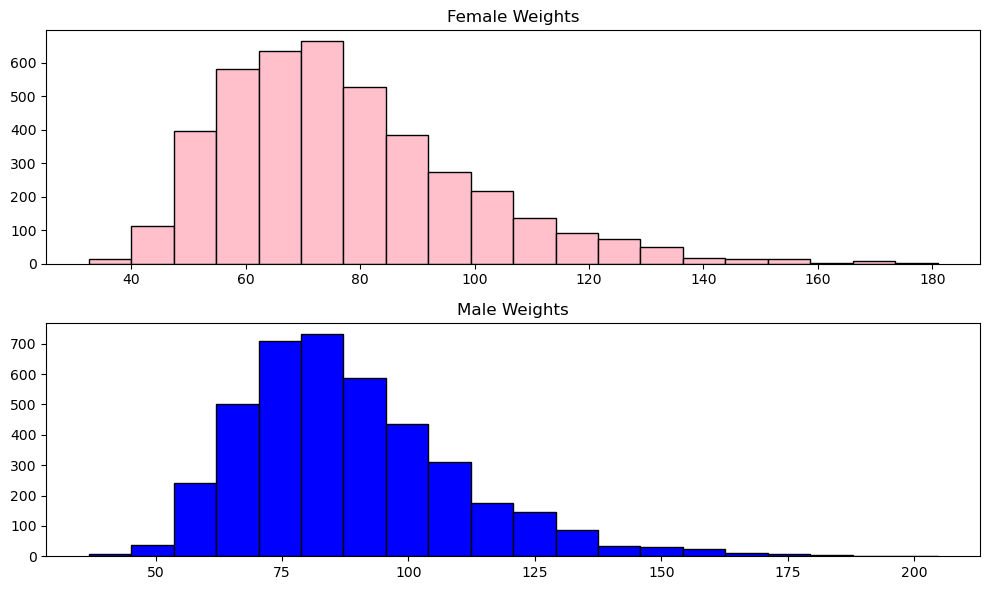

In [49]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.hist(female[:,0], bins=20, color='pink', edgecolor='black')
plt.title('Female Weights')

plt.subplot(2,1,2)
plt.hist(male[:,0], bins=20, color='blue', edgecolor='black')
plt.title('Male Weights')

plt.tight_layout()
plt.show()

##Step 4: Histograms of Weights
=>We plot histograms to visualize the distribution of male and female weights.
=>The Female Weights histogram (pink) shows most values between 55–85 kg, with the peak around 70 kg.
=>The Male Weights histogram (blue) shows most values between 65–95 kg, with the peak around 80 kg.
=>Both distributions are approximately bell-shaped (normal distribution), but males generally have higher weights than females.

## Step 5: Boxplot of Male vs Female Weights

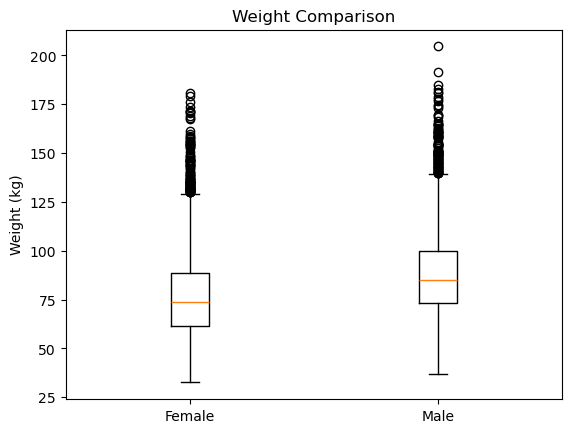

In [55]:
plt.boxplot([female[:,0], male[:,0]], labels=['Female','Male'])
plt.title('Weight Comparison')
plt.ylabel('Weight (kg)')
plt.show()

##Step 5: Boxplot of Male vs Female Weights
=>The boxplot shows the distribution of male and female weights.
=>The median weight of males is higher than that of females.
=>Both groups have a similar spread of data, but males generally weigh more.
=>Outliers are present in both categories, indicating individuals with unusually high weights.

## Step 6: Summary Statistics

In [53]:
def summary_stats(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'skewness': skew(data),
        'kurtosis': kurtosis(data)
    }

print("Female Weight Stats:", summary_stats(female[:,0]))
print("Male Weight Stats:", summary_stats(male[:,0]))

Female Weight Stats: {'mean': 77.3961155850308, 'median': 73.6, 'std_dev': 21.545727738334076, 'skewness': 1.0329162002533054, 'kurtosis': 1.3999795147763656}
Male Weight Stats: {'mean': 88.37229299363058, 'median': 85.05, 'std_dev': 21.422034818870188, 'skewness': 0.9833167193050703, 'kurtosis': 1.4703466413831663}


## Step 6: Summary Statistics
In this step, we define a function summary_stats() to calculate key statistical measures:
=>Mean: Average value of the data
=>Median: Middle value of the data
=>Standard Deviation: Measure of spread/variation
=>Skewness: Shows symmetry of the data distribution
=>Kurtosis: Shows the "peakedness" of the distribution
We apply this function to both female and male weight data.
=>Female Weight Stats → Mean: 77.39, Median: 73.6, Std Dev: 21.54, Skewness: 1.03, Kurtosis: 1.39
=>Male Weight Stats → Mean: 88.37, Median: 85.05, Std Dev: 21.42, Skewness: 0.98, Kurtosis: 1.47